# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [2]:
def has_transitioned(prob):
    r = random.random()
    if r >prob:
        return False
    else:
        return True

In [3]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [4]:
def evolveOne(currentState, rules):
    for before, after, prob in rules:
        if currentState == before:
            if has_transitioned(prob) == True:
                return after 
            else:
                return before 
    return currentState
    
        
        

In [5]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [6]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [7]:
def evolveMany(states, rules):
    newState = []
    for i in range(len(states)):
        x = evolveOne(states[i], rules)
        newState.append(x)
    return newState


In [8]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [9]:
def evolve_system(NA, NB, NC, rules, n_timestep):
    state = (['A'] * NA)+(['B'] * NB)+(['C'] * NC)

    A_count = numpy.empty(n_timestep + 1, dtype=int)
    B_count = numpy.empty(n_timestep + 1, dtype=int)
    C_count = numpy.empty(n_timestep + 1, dtype=int)
    A_count[0] = NA
    B_count[0] = NB
    C_count[0] = NC
    for i in range(1,n_timestep+1):
        state = evolveMany(state,rules)
        A_count[i] = state.count('A')
        B_count[i] = state.count('B')
        C_count[i] = state.count('C')
    print (A_count)
    return A_count, B_count, C_count

In [10]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

[ 0  0  0  2  3  4  5  6  8 11 13 13 17 18 21 23 28 30]


In [11]:
# these tests are worth 2 marks 
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)
    
]

random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
assert (r1 == [200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]).all()
assert (r2 == [200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]).all()
assert (r3 == [200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]).all()

[200 213 233 250 258 251 266 263 259 260 265 259 256 255 258 256 259 253
 249 247 253]


## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




[  0  47  84 107 133 154 161 162 168 176 189 191 190 189 188 185 183 177
 172 166 167 163 156 157 152 151 149 143 143 139 138 132 132 130 126 125
 123 119 119 117 112 109 109 109 107 104 103 104 102 103 104 106 105 103
 106 106 108 109 107 109 113 113 107 104 101 102 102  98  98  98 101 103
 102 102  98  96  90  85  84  83  84  84  89  90  90  88  85  88  85  86
  88  89  89  88  85  89  89  89  90  92  91  93  91  89  86  84  84  83
  85  83  84  86  87  85  85  85  84  81  85  88  89  85  84  81  77  73
  72  73  74  77  76  77  74  75  74  76  81  83  83  82  80  82  83  85
  83  86  83  82  78  80  77  75  77  78  79  78  79  78  81  85  86  86
  82  83  91  89  94  90  89  91  91  92  91  89  92  92  91  96  98  97
  97  99  97  97  97  97  94  92  91  93  95  97 100  99  94  92  95  94
  94  91  92]
[91 87 84 80 76 75 74 71 70 69 66 64 60 58 58 55 55 50 50 50 47 45 42 40
 38 33 31 30 30 30 30 30 27 26 26 24 23 22 21 21 21 21 20 20 20 20 18 18
 18 18 17 16 15 15 15 15 15 14 14 14 

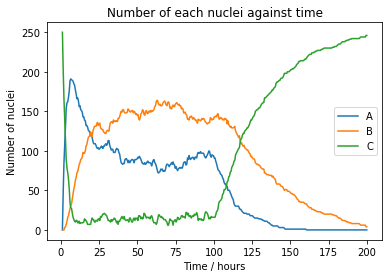

In [12]:
nsteps1 = 200
nsteps2 = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2
NA = 0
NB =0
NC = 250


timestep = t_total/200
probA = 1-numpy.exp(-timestep/(t_half_A/numpy.log(2)))
probB = 1-numpy.exp(-timestep/(t_half_B/numpy.log(2)))
probC = 1-numpy.exp(-timestep/t_half_C/(numpy.log(2)))

rules1 = [
    ('A', 'B', probA),
    ('B', 'C', probB),
    ('C', 'A', probC)
    
]

A1 = numpy.zeros(200)
B1 = numpy.zeros(200)
C1 = numpy.zeros(200)

withflux = evolve_system(NA, NB, NC, rules1, nsteps1)

time = numpy.linspace(1,200,400)
   
for i in range(0,200):
    A1[i] = withflux[0][i]
    B1[i] = withflux[1][i]
    C1[i] = withflux[2][i]

#without flux
    
rules2 = [
    ('A', 'B', probA),
    ('B', 'C', probB),
    
]

A2 = numpy.zeros(200)
B2 = numpy.zeros(200)
C2 = numpy.zeros(200)

NA2 = int(A1[199])
NB2 = int(B1[199])
NC2 = int(C1[199])

withoutflux = evolve_system(NA2, NB2, NC2, rules2, nsteps2)

for i in range(0,200):
    A2[i] = withoutflux[0][i]
    B2[i] = withoutflux[1][i]
    C2[i] = withoutflux[2][i]
    
A = numpy.concatenate((A1,A2))
B = numpy.concatenate((B1,B2)) 
C = numpy.concatenate((C1,C2))

plt.plot(time,A, label = "A")
plt.plot(time,B, label = "B")
plt.plot(time,C, label = "C")
plt.xlabel("Time / hours")
plt.ylabel("Number of nuclei")
plt.title("Number of each nuclei against time")
plt.legend()

Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


In [25]:
y = []
nsteps1 = 200
nsteps2 = 200
t_total = 200
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2
NA = 0
NB =0
NC = 250

for i in range (0,21):
    timestep = t_total/200
    probA = 1-numpy.exp(-timestep/(t_half_A/numpy.log(2)))
    probB = 1-numpy.exp(-timestep/(t_half_B/numpy.log(2)))
    probC = 1-numpy.exp(-timestep/t_half_C/(numpy.log(2)))

    rules = [
        ('A', 'B', probA),
        ('B', 'C', probB),
        ('C', 'A', probC)
    
    ]

    A1 = numpy.zeros(100)
    B1 = numpy.zeros(100)
    C1 = numpy.zeros(100)

    withflux = evolve_system(NA, NB, NC, rules, nsteps1)

    time = numpy.linspace(1,200,200)
   
    for i in range(0,100):
        A1[i] = withflux[0][i]
        B1[i] = withflux[1][i]
        C1[i] = withflux[2][i]

    #without flux
    
    rules2 = [
        ('A', 'B', probA),
        ('B', 'C', probB),
    
    ]

    A2 = numpy.zeros(100)
    B2 = numpy.zeros(100)
    C2 = numpy.zeros(100)
    NA2 = int(A1[99])
    NB2 = int(B1[99])
    NC2 = int(C1[99])

    withoutflux = evolve_system(NA2, NB2, NC2, rules2, nsteps2)

    for i in range(0,100):
        A2[i] = withoutflux[0][i]
        B2[i] = withoutflux[1][i]
        C1[i] = withoutflux[2][i]
    
    A = numpy.concatenate((A1,A2))
    y.append(A)

for i in range (1,201):
    x = numpy.average(y[i])
    z = numpy.std(y[i])

plt.errorbar(time,x,yerr=z)




[  0 100 142 173 192 202 202 189 184 171 157 147 146 137 131 131 127 120
 119 116 115 114 104  97 100  99  94 100  92  89  89  85  84  89  90  94
  94  89  83  82  80  88  88  82  85  84  84  89  91  89  89  92  89  90
  96  91  89  96  94  98 100 102  97  98 100 104 100 102 101 100 101 100
  94  90  90  87  90  87  87  88  84  85  88  84  88  89  83  82  86  81
  88  89  93  96  95  91  90  86  90  87  97  97  95  91  92  88  86  85
  85  85  84  95  92  97  99  99  94  86  84  87  90  91  89  92  92  91
  85  91  94  99  98  91  94 100 101  99  99 103 103 104 104 102 100  96
  95  97  98 103 106 104 101 106 108 108 100  94  91  88  93  93  93  90
  86  85  87  91  91  91  93  97  97 105  97  90  88  93  96  96  91  90
  90  93  92  95 100  97  92  94  93  89  89  85  84  82  85  86  93  91
  90  91  85]
[87 81 76 70 62 60 52 50 50 46 43 40 39 39 34 33 31 31 29 28 27 21 19 16
 14 14 11 10  9  9  9  8  8  7  7  7  7  7  7  7  7  6  4  4  4  2  2  1
  1  0  0  0  0  0  0  0  0  0  0  0 

[100  93  85  73  69  65  62  56  52  45  42  37  33  29  28  28  28  26
  24  23  22  20  18  18  15  15  13  12  10   9   8   8   8   8   8   7
   7   7   7   6   5   5   4   4   4   4   3   2   2   2   2   2   2   2
   2   2   2   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
[  0  77 131 165 172 173 179 185 172 164 151 145 136 130 126 121 115 112
 111 106 103 104 101 103 108 115 109 105  98  96  99  94  92  89  90  98
  91  89  86  90  93  95  95 105 105 

[  0  87 143 173 185 193 186 181 177 176 163 151 146 142 140 131 126 114
 110 106 101  97  90  95  95  91  90  92  88  89  86  86  85  87  88  87
  89  92  95  93  95  96  97  97  93  89  91  90  87  87  89  92  91  85
  88  89  88  86  83  82  76  74  80  70  77  77  75  78  78  82  89  88
  90  93  91  89  82  85  87  83  76  76  71  74  74  75  79  82  84  78
  75  82  81  76  74  80  79  80  82  87  86  94  99  97  97  96  93  93
  92  86  89  84  84  89  87  86  92  90  87  87  80  79  81  83  84  76
  77  70  73  76  76  77  77  80  79  72  76  79  83  82  89  94  92  94
  91  94  90  93  87  84  82  79  80  82  82  80  88  86  82  86  82  82
  83  84  83  85  85  83  84  85  88  87  87  88  86  82  82  79  86  82
  90  91  92  95  88  87  80  80  86  84  83  89  87  85  83  87  87  90
  96  90  83]
[87 85 81 79 73 63 54 46 43 40 38 35 34 34 31 28 27 27 26 25 22 18 17 15
 13 12 11 10 10 10  9  8  8  7  4  4  4  4  3  3  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  1  1  1  1  1 

IndexError: list index out of range